In [1]:
import nibabel as nib
import numpy as np
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer, UpSampling2D

import matplotlib.pyplot as plt

In [2]:
def load_image(path):
    img = cv2.imread(path)
    if img.shape[2] == 4:
        img = img[:,:,:-1]
    return img

In [102]:
niifile1 = 'ct_color\DADOS_Joao\_ARQUIVOS_NII\Testemunho 1\Libra_CX2_T1_222_154_1440_Energy1.nii'
niifile2 = 'ct_color\DADOS_Joao\_ARQUIVOS_NII\Testemunho 1\Libra_CX2_T1_222_154_1440_Energy2.nii'

slc = 77

data1 = np.array(nib.load(niifile1).get_data())[:,slc+1,:]/255
data2 = np.array(nib.load(niifile2).get_data())[:,slc+1,:]/255

X = np.zeros((1,data1.shape[0],data1.shape[1],2))
X[0,:,:,0] = data1
X[0,:,:,1] = data2

Y = load_image('ct_color\DADOS_Joao\ARQUIVOS_HDI\TESTO1\caixa2_78.PNG')[::-1,::-1,:]/255

sizeX = (X.shape[2],X.shape[1])

Y = cv2.resize(Y, dsize=sizeX, interpolation=cv2.INTER_CUBIC)
Y = Y.reshape(1,Y.shape[0],Y.shape[1],Y.shape[2])



print(X.shape,Y.shape)

(1, 222, 1440, 2) (1, 222, 1440, 3)


In [145]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))



model.compile(optimizer='rmsprop', loss='mse')
model.fit(x=X,y=Y,batch_size=1,epochs=50,verbose=2)
print(model.evaluate(X, Y, batch_size=1))

Train on 1 samples
Epoch 1/50
1/1 - 1s - loss: 0.1708
Epoch 2/50
1/1 - 0s - loss: 0.2040
Epoch 3/50
1/1 - 0s - loss: 0.1229
Epoch 4/50
1/1 - 0s - loss: 0.0700
Epoch 5/50
1/1 - 0s - loss: 0.1690
Epoch 6/50
1/1 - 0s - loss: 0.1735
Epoch 7/50
1/1 - 0s - loss: 0.1357
Epoch 8/50
1/1 - 0s - loss: 0.0981
Epoch 9/50
1/1 - 0s - loss: 0.0699
Epoch 10/50
1/1 - 0s - loss: 0.0877
Epoch 11/50
1/1 - 0s - loss: 0.0352
Epoch 12/50
1/1 - 0s - loss: 0.0289
Epoch 13/50
1/1 - 0s - loss: 0.0366
Epoch 14/50
1/1 - 0s - loss: 0.0409
Epoch 15/50
1/1 - 0s - loss: 0.0385
Epoch 16/50
1/1 - 0s - loss: 0.0294
Epoch 17/50
1/1 - 0s - loss: 0.0260
Epoch 18/50
1/1 - 0s - loss: 0.0231
Epoch 19/50
1/1 - 0s - loss: 0.0217
Epoch 20/50
1/1 - 0s - loss: 0.0207
Epoch 21/50
1/1 - 0s - loss: 0.0202
Epoch 22/50
1/1 - 0s - loss: 0.0199
Epoch 23/50
1/1 - 0s - loss: 0.0199
Epoch 24/50
1/1 - 0s - loss: 0.0201
Epoch 25/50
1/1 - 0s - loss: 0.0203
Epoch 26/50
1/1 - 0s - loss: 0.0206
Epoch 27/50
1/1 - 0s - loss: 0.0207
Epoch 28/50
1/1 - 

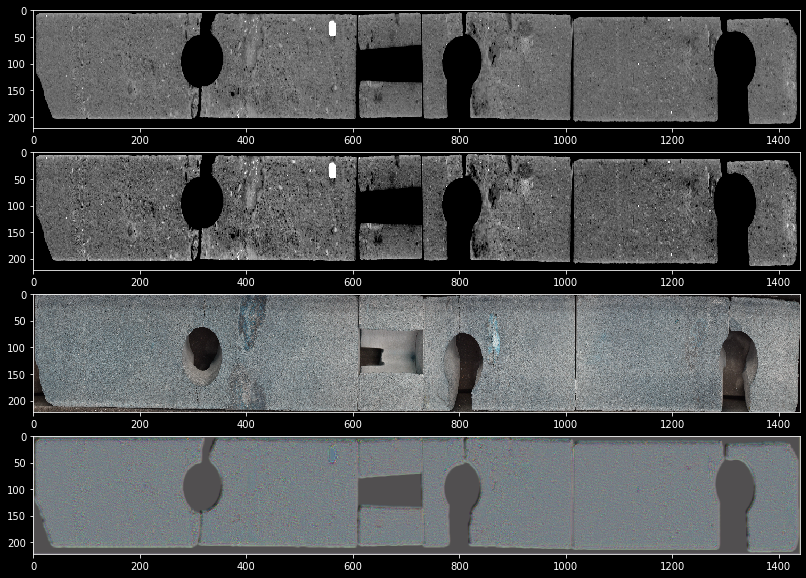

In [146]:
output = model.predict(X)[0]*255
plt.figure(figsize=[20,10])
plt.subplot(4,1,1)
plt.imshow((X[0,:,:,0]*255).astype(int),cmap='gray')
plt.subplot(4,1,2)
plt.imshow((X[0,:,:,1]*255).astype(int),cmap='gray')
plt.subplot(4,1,3)
plt.imshow((Y[0]*255).astype(int))
plt.subplot(4,1,4)
plt.imshow(output.astype(int))